# Анализ рынка вакансий для HR Агентства

# Описание проекта

Анализ данных кадрового агентства. 

# Цель проекта

Выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства. 


# Описание данных

Нам доступен датасет с данными кадрового агентства в файле /datasets/vacancy_clear.xlsx

Описание столбцов:

* id - Уникальный идентификатор вакансии     
* Статус - Статус вакансии. Категориальное значение. Возможные значения: 
    * Архив - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства; 
    * Закрыта нами - вакансия закрыта, подходящая кандидатура найдена силами агентства;
    * Активна - вакансия опубликована, идет активный поиск кандидатов;
    * На рассмотрении - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
    * Отклонена - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется;
    * Черновик - вакансия в стадии заполнения. |
* Источник лида - Источник вакансии. Категориальное значение. Возможные значения:
    * Входящая заявка - заказчик сам заполнил форму на сайте КА;
    * Сорсинг - менеджеры КА привлекли заказчика исходящим поиском;
    * Повторная - это не первая вакансия компании, подбор на которую будет делать КА;
    * Реферальная - заказчик пришел в КА по рекомендации от другого заказчика.
* Менеджер - Менеджер, ответственный за вакансию. Возможны пустые значения в связи с тем, что это поле сначала не существовало, потом было не обязательным к заполнению.
* Дата публикации - Дата, когда вакансия была опубликована на сайте КА.
* Дата закрытия - Дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии.
* Количество просмотров - Количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию.
* Количество откликов - Количество уникальных пользователей сайта, отправивших отклик на вакансию.
* Позиция - Название вакансии
* Зарплата от - Нижняя граница заработной платы для вакансии. Поля может быть пустым.
* Зарплата до - Верхняя граница заработной платы для вакансии. Поле может быть пустым.
* Город - В каких городах предлагается работа вне зависимости от формата. Например, может быть указан город Москва - при этом занятость необязательно офисная, поэтому кандидат может находиться в другой локации.
* Формат оформления - Какой формат оформления предлагает заказчик.
* Формат работы - Какой формат работы предлагает заказчик.
* Опыт - Какой опыт работы должен быть у соискателя.
* Образования - Какое образование должно быть у соискателя.
* Ссылка на тестовое - Есть ли ссылка на тестовое задание в описании вакансии.
* Занятость - Какой формат занятости предлагает заказчик.
* Обязательные требования - Какие обязательные требования предъявляет заказчик к кандидатам.
* Дополнительный требования - Какие дополнительные требования предъявляет заказчик к кандидатам.
* Этапы отбора - Этапы отбора на должность
* Условия - Краткое текстовое описание условий вакансии. Может повторять информацию из других столбцов

# Загрузка библиотек и глобальных переменных

In [1]:
# %pip install matplotlib==3.7
# %pip install ydata-profiling

In [61]:
import pandas as pd
import numpy as np
import warnings

from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from ydata_profiling import ProfileReport
from scipy.stats import ttest_ind

%matplotlib inline
warnings.filterwarnings("ignore", category=RuntimeWarning)
pd.options.display.float_format = '{: .2f}'.format # отображение 2 знаков после запятой в float
pd.options.display.max_rows = False
pd.options.display.max_columns = False
pd.options.display.max_colwidth = False
# pd.options.display.precision = 2

# sns.set_palette('plasma') # настройка общей палитры
plt.style.use('seaborn') #-v0_8-darkgrid') # настройка общей палитры

C:\Users\igorz\AppData\Local\Temp\ipykernel_2560\3224686409.py:21: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Пользовательские функции

In [62]:
# ф-ция приведения названий столбцов в змеиный регистр (не использую)
def make_snake_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df


# Загрузка данных

In [63]:
# копируем ссылку на файл, предварительно открыв доступ по ссылке на чтение
url='https://docs.google.com/spreadsheets/d/1lfPkvJBKA45x3dpjfBFWAITJuv2p-1cQ/edit?usp=drive_link&ouid=110753468860815012723&rtpof=true&sd=true'
# преобразуем ссылку для корректного чтения файла
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_excel(url, sheet_name = 'statistics', parse_dates=['Дата закрытия','Дата публикации'],)

# Первичный осмотр данных

In [65]:
profile = ProfileReport(df)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Вывод:**
* Пропущенные значения в столбцах Зарплата от, Зарплата до, Дополнительный требования, Дата закрытия (%). Всего	9.2% - оставим как есть
* Дубликаты	полные (%)	0.0%
* Есть наличие корреляции между Количество откликов и Количество просмотров 0.694
* В столбце меньше 10% отличающихся значений которые могут влиять => можно удалить столбец?    
    * 'Опыт', значения: 'До 1 года опыта, возможен опыт в pet-проектах; без опыта'	91.9%, 'До 1 года опыта, возможен опыт в pet-проектах' 5.9%, 'Опыт от 1 года' 2.0%, 'Без опыта' 0.2%. Да, можно удалить тк в 91.9% выбраны все возможные варианты 
    * 'Образование', значения: 'Другое, На смежных специальностях, Профильное' 96.6%, 'На смежных специальностях, Профильное' 3.3%, Профильное 0.2%.  Да, можно удалить тк в 96.6% выбраны все возможные варианты 
    * 'Ссылка на тестовое', значения: 'нет' 91.7%, 'да' 8.3%. Да, можно удалить тк в 91.7% 'нет'  
* Отбросим те столбцы, которые заведомо не будут важными для кандидата с точки зрения выбора вакансии для отклика: Менеджер, Источник лида

# Подготовка данных и генерация новых признаков


In [66]:
# удалим столбцы
df.drop(['Опыт','Образование','Ссылка на тестовое','Менеджер', 'Источник лида'], axis= 1 , inplace= True )

In [67]:
# средняя зарплата
# -1 если не указана в обоих столбцах
def get_avg_salary(row):    
    if not pd.isna(row['Зарплата от']) and not pd.isna(row['Зарплата до']):
        return round((row['Зарплата от'] + row['Зарплата до'])/2) 
    if not pd.isna(row['Зарплата от']) and pd.isna(row['Зарплата до']):
        return round(row['Зарплата от'])
    if pd.isna(row['Зарплата от']) and not pd.isna(row['Зарплата до']):
        return round(row['Зарплата до'])
    # return -1

df['средняя_зарплата'] = df.apply(get_avg_salary, axis=1)

# проверим
df[['Зарплата от', 'Зарплата до', 'средняя_зарплата']].sample(5).sort_values(by='средняя_зарплата')

Зарплата от  Зарплата до  средняя_зарплата
865   30000.00     60000.00     45000.00        
485   40000.00     65000.00     52500.00        
586   30000.00     80000.00     55000.00        
1193  97000.00     138000.00    117500.00       
1084 NaN          NaN          NaN

In [68]:
# import datetime as dt

# время жизни вакансии в днях
# -1 если не закрыта
def get_vacancy_lifetime(row):    
    if not pd.isna(row['Дата закрытия']):
        return (row['Дата закрытия'] - row['Дата публикации']).days        
    return -1

df['срок_закрытия'] = df.apply(get_vacancy_lifetime, axis=1)
# df['срок_закрытия'] = (df['Дата закрытия'] - df['Дата публикации']).dt.days


Разобьем датафрейм на 3 равные категории по столбцам Количество просмотров и Количество откликов

In [69]:
bin_labels_3 = ['низкое', 'среднее', 'высокое'] # названия категорий

# разобьем на равные категории
df['категория_просмотров'] = pd.qcut(df['Количество просмотров'], labels=bin_labels_3, q=3)
df['категория_откликов'] = pd.qcut(df['Количество откликов'], labels=bin_labels_3, q=3)

# проверим
df[['Количество просмотров', 'категория_просмотров']].sample(5).sort_values(by='Количество просмотров')

Количество просмотров категория_просмотров
871   13                     низкое             
117   22                     среднее            
95    31                     среднее            
1084  41                     среднее            
696   66                     высокое

In [70]:
# создадим столбец указана_зарплата обозначающий, что в одной из колонок указана зарплата
df['указана_зарплата'] = np.where(df['средняя_зарплата']>0, True, False)

# создадим столбец есть_удаленка обозначающий, что есть удаленка
df['есть_удаленка'] = np.where(df['Формат работы'].str.contains('Удаленка'), True, False)

# создадим столбец только_офис обозначающий, что можно работать только из офиса
df['только_офис'] = np.where(df['Формат работы']=='Офис', True, False)

# проверим
df[['средняя_зарплата','указана_зарплата','Формат работы','есть_удаленка', 'только_офис']].sample(10)

средняя_зарплата  указана_зарплата  ... есть_удаленка  только_офис
916  NaN                False             ...  True          False      
1127  55000.00          True              ...  True          False      
953   70000.00          True              ...  True          False      
83    120000.00         True              ...  True          False      
1054  60000.00          True              ...  True          False      
154   50000.00          True              ...  True          False      
265  NaN                False             ...  False         False      
846   41400.00          True              ...  False         False      
982  NaN                False             ...  True          False      
431   50000.00          True              ...  True          False      

[10 rows x 5 columns]

**Вывод:**
* Удалили ненужные нам столбцы 'Опыт','Образование','Ссылка на тестовое','Менеджер', 'Источник лида'
* Создали столбцы с признаками:
    * 'средняя_зарплата' - средняя зарплата на основе столбцов 'Зарплата от' и 'Зарплата до'
    * 'срок_закрытия' - время жизни вакансии в днях с даты открытия до закрытия
    * указана зарплата - указана зарплата
    * 'есть удаленка' - есть удаленный формат работы
    * 'только_офис' - можно работать только из офиса
* Разбили датафрейм на 3 равные категории по столбцам Количество просмотров и Количество откликов и сохранили их в столбцах 'категория_просмотров' и 'категория_откликов'


# Изучение воронки событий

В качестве воронки возьмем следующую последовательность событий: Больше 1 просмотра -> больше 1 отклика -> статус закрыто нами

In [71]:
views_count = len( df[ df['Количество просмотров'] > 1 ] )
response_count = len( df[ df['Количество откликов'] > 1 ] )
closed_success_count = len( df[ df['Статус'] == 'Закрыта нами' ] )

print(views_count, response_count, closed_success_count)


1278 1175 320


In [72]:
data = dict(
    number=[views_count, response_count, closed_success_count],
    stage=['Вакансий просмотрено','Вакансий с откликами','Вакансий закрыто КА'])

fig = go.Figure(go.Funnel(  x=data['number'], y=data['stage'], 
                            textposition = "inside", 
                            textinfo = "value+percent initial"  ))
fig.update_layout(title_text="Воронка событий")
fig.update_yaxes(title_text="Событие")

fig.show()

**Вывод:**

Таким образом у нас получается следующая воронка:
* Кандидат видит название позиции, например в личном кабинете на сайте => проходит по ссылке для просмотра вакансии
* Посмотрел вакансию, заинтересовался => проходит по ссылке откликнуться на вакансию

# Исследовательский анализ данных

## Анализ наиболее популярных у кандидатов названий позиций и их описаний

В соответствии с воронкой сначала отберем наиболее часто встречающиеся слова в *названии* позиции в вакансиях с наибольшим количеством *просмотров*. А затем отберем наиболее часто встречающиеся слова в *описании* позиции в вакансиях с наибольшим количеством *откликов*.


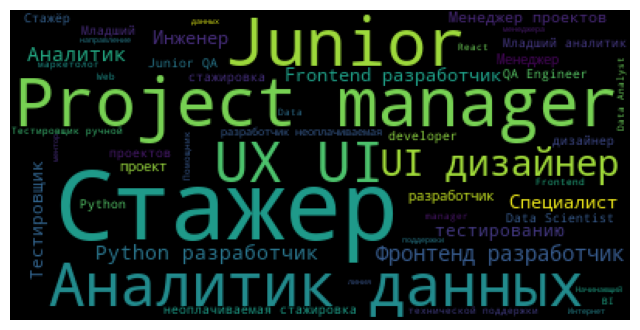

In [73]:

# Объединяем данные из колонки 'Позиция'
text = ' '.join(df.query('категория_просмотров=="высокое"')['Позиция'])
# print(text)

# Генерируем облако слов и сохраняем в переменной cloud
cloud = WordCloud(max_words = 50).generate(text)

# plt.figure(figsize=(15,15))

# Выводим облако слов на экран
plt.imshow(cloud)
# Отключаем отображение осей
plt.axis('off');


**Вывод:**
* Наиболее востребованы у кандидатов позиции, содержащие следующие слова и сочетания:
    * Стажер
    * Project manager
    * Junior
    * Аналитик данных
    * UX UI
    * UI дизайнер

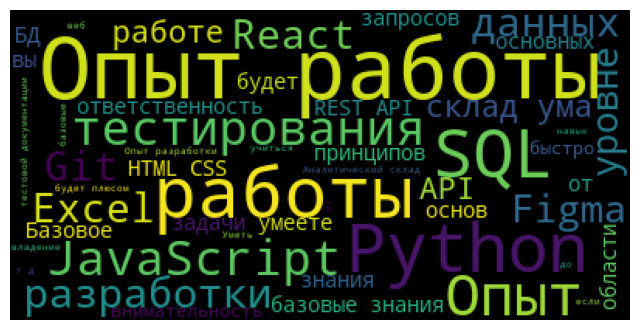

In [74]:
# нет необходимости - не используем
# подгружаем библиотеку nltk со стоп-словами
# from nltk.corpus import stopwords
# сохраняем список с русскими стоп-cловами в переменную stop_words
# stop_words = stopwords.words('russian')

# добавляем в список стоп-слов короткие слова, символы форматирования 
# и общие требования для отображения только технологий
STOPWORDS.update(['_x000D_', 'и', 'с', 'для', 'ты', 'как', 'не', 'по', 'на', 'их', 'с', 'что', 'в', 'или', 'к', 
                  'Знание', 'Умение', 'понимание', 'работать', 'навыки', 'готовность', 'желание', 'способность', 'развиваться',
                  'Работа', 'команде',])

# Объединяем данные из колонки 'Позиция'
text = ' '.join(df.query('категория_откликов=="высокое"')['Обязательные требования'])
# print(text)

# Генерируем облако слов и сохраняем в переменной cloud
cloud = WordCloud(stopwords=STOPWORDS, max_words = 50,).generate(text)

# plt.figure(figsize=(15,15))

# Выводим облако слов на экран
plt.imshow(cloud)
# Отключаем отображение осей
plt.axis('off');


**Вывод:**
* Наиболее востребованы у кандидатов Обязательные требования, содержащие следующие слова и сочетания:
    * Опыт работы
    * Python
    * SQL
    * JavaScript

# Выдвижение гипотез и их опровержение / проверка

## Гипотеза - вакансии с форматом работы только из офиса менее востребованы у кандидатов по сравнению с другими (меньше откликов)

Посмотрим соотношение количество откликов, которое приходится на 1 вакансию в зависимости от наличия признака только_офис:

In [75]:
df_grouped = df.groupby('только_офис').agg({'Количество откликов':['count','sum']}).set_axis(['количество_вакансий','сумма_откликов'], axis='columns')  
df_grouped['откликов_на_вакансию'] = df_grouped['сумма_откликов']/df_grouped['количество_вакансий']
df_grouped = df_grouped.sort_values(by='откликов_на_вакансию', ascending=True) 
df_grouped

количество_вакансий  сумма_откликов  откликов_на_вакансию
только_офис                                                           
True         106                  685             6.46                
False        1178                 14097           11.97

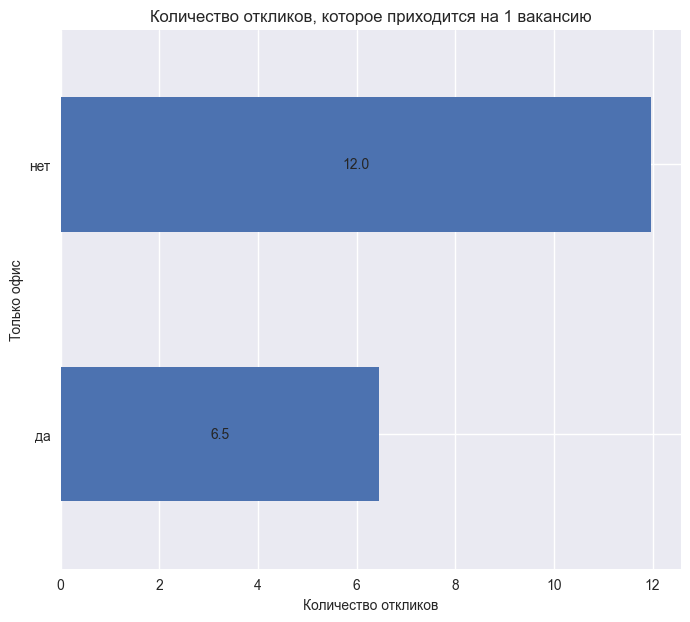

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(8, 7))
df_grouped.plot(kind='barh', y='откликов_на_вакансию', ax=axes)
for c in axes.containers:
    axes.bar_label(c, fmt='{:.1f}', label_type='center')
axes.set(ylabel='Только офис', xlabel='Количество откликов', title='Количество откликов, которое приходится на 1 вакансию')
axes.set_yticklabels(['да','нет'])
axes.get_legend().remove()
# axes.set_xlim(6, 12.5);

**Вывод:**
* Мы подтвердили гипотезу, что вакансии с форматом работы только из офиса менее востребованы у кандидатов по сравнению с другими (меньше откликов)

## Гипотеза - вакансии с удаленным режимом работы более востребованы у кандидатов по сравнению с другими (больше откликов)

Посмотрим количество откликов в зависимости от наличия признака есть_удаленка:

In [78]:
df.groupby('есть_удаленка')['Количество откликов'].sum().sort_values(ascending=False)

есть_удаленка
True     11756
False    3026 
Name: Количество откликов, dtype: int64

Гипотеза: Вакансии с удаленным режимом работы (тестовая группа) более востребованы у кандидатов по сравнению с другими вакансиями (контрольная группа) по количеству откликов.

НУЛЕВАЯ гипотеза: Нет статистически значимой разницы по количеству откликов между вакансиями с удаленным режимом работы и без.

Уровень статистической значимости alpha примем равным 0.05

Набор нужных нам данных состоит из трех полей:

* id - уникальный идентификатор для отслеживания каждой вакансии
* есть_удаленка - наличие удаленного режима работы
* 'Количество откликов' - количество откликов на вакансию

Посмотрим уникальные значения в каждом поле и описательную сводную статистику:

In [79]:
df[['id','есть_удаленка','Количество откликов']].nunique()

id                     1284
есть_удаленка          2   
Количество откликов    64  
dtype: int64

In [80]:
df[['id','есть_удаленка','Количество откликов']].describe().T

count     mean     std  ...      50%      75%      max
id                   1284.00  1168.13  530.71  ...  1171.50  1635.50  2073.00
Количество откликов  1284.00  11.51    12.66   ...  8.00     15.00    151.00 

[2 rows x 8 columns]

Проверим, как распределяются данные, используя диаграмму размаха:

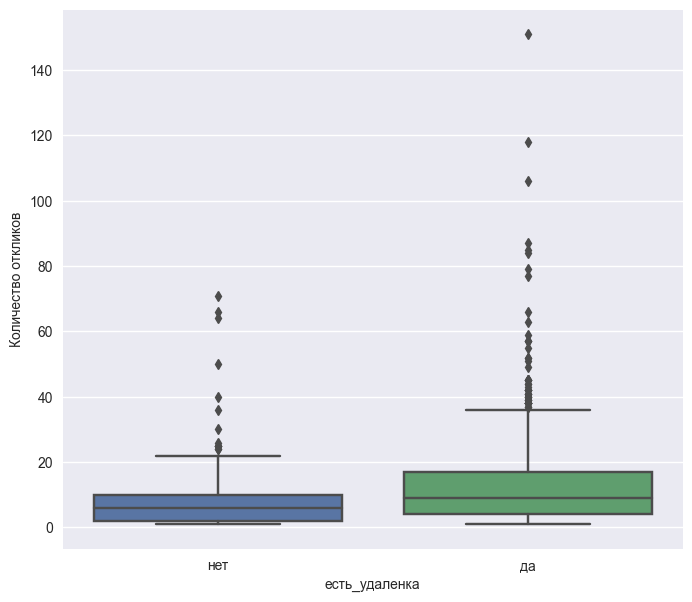

In [81]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(8, 7))
sns.boxplot(x='есть_удаленка', y='Количество откликов', data=df, ax=axes)
axes.set_xticklabels(['нет','да']);

Из графика видно, что в данных наблюдается значительный выброс. Выясним это, отсортировав значения откликов в порядке убывания и просмотрев 10 лучших значений

In [82]:
df[['id','есть_удаленка','Количество откликов']].sort_values(by='Количество откликов', ascending=False).iloc[:10]

id  есть_удаленка  Количество откликов
987   1673  True           151                
1078  1792  True           118                
438   861   True           106                
662   1198  True           87                 
819   1435  True           85                 
1025  1721  True           84                 
1220  1986  True           79                 
935   1597  True           77                 
1185  1947  False          71                 
1133  1862  False          66

Нельзя достоверно сказать, что большие значения являются выбросами. Поэтому оставляем их.

Теперь разделим данные на две части по признаку есть_удаленка:

In [83]:
control = df[ ~df['есть_удаленка'] ]['Количество откликов']
control.describe()

count    389.00
mean     7.78  
std      8.38  
min      1.00  
25%      2.00  
50%      6.00  
75%      10.00 
max      71.00 
Name: Количество откликов, dtype: float64

In [84]:
variation = df[ df['есть_удаленка'] ]['Количество откликов']
variation.describe()

count    895.00
mean     13.14 
std      13.82 
min      1.00  
25%      4.00  
50%      9.00  
75%      17.00 
max      151.00
Name: Количество откликов, dtype: float64

Обычно рекомендуется разделить тестовую и контрольную группы поровну при A/B тестировании, чтобы гарантировать, что любые различия в результатах теста не вызваны неравномерным распределением участников между группами. Продолжим, взяв минимальный размер выборки и случайным образом отобрав равное количество точек данных из каждой группы

In [85]:
# определим минимальный размер выборки из двух групп
min_sample_size = min(len(control), len(variation))
print("Размер выборки:", min_sample_size)

Размер выборки: 389


In [86]:
# Случайным образом отберем равное количество точек данных из каждой группы

# для контрольной группы
control = np.random.choice(control, size=min_sample_size, replace=False)

# для тестовой группы 
variation = np.random.choice(variation, size=min_sample_size, replace=False)

Проанализируем наши данные

Проверим, приводит ли удаленный режим к увеличению количества откликов. Для этого мы можем использовать t-критерий, чтобы определить, существует ли статистически значимая разница в откликах между двумя группами. Здесь мы используем модуль ttest_ind из библиотеки scipy python для вычисления t-теста для откликов.

In [87]:
t_stat, p_value = ttest_ind(control, variation)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -7.29746196168819
p-value:  7.261682968625409e-13


Здесь мы можем видеть, что p-value, полученное в результате t-теста, составляет около 1.6e-10

Сделаем вывод

Если значение p меньше 0,05, мы можем отклонить нулевую гипотезу и сделать вывод, что существует статистически значимая разница в откликах между двумя группами. Более того, в этом случае мы можем заключить, что тестовая или контрольная группа привели к увеличению откликов в зависимости от их средних. В противном случае мы должны принять нулевую гипотезу. 

In [88]:
alpha = 0.05
if p_value < alpha:
    print("РЕЗУЛЬТАТ: Существует статистически значимая разница в количестве откликов между контрольной и тестовой группами.")
    if variation.mean() > control.mean():
        print("РЕЗУЛЬТАТ: Тестовая группа имеет более высокие количества откликов.")
    else:
        print("РЕЗУЛЬТАТ: Контрольная группа имеет более высокие количества откликов.")
        
else:
    print("РЕЗУЛЬТАТ: Статистически значимой разницы в количестве откликов между контрольной и тестовой группами нет.")

РЕЗУЛЬТАТ: Существует статистически значимая разница в количестве откликов между контрольной и тестовой группами.
РЕЗУЛЬТАТ: Тестовая группа имеет более высокие количества откликов.


**Вывод:**
*  Мы подтвердили гипотезу - вакансии с удаленным режимом работы более востребованы у кандидатов по сравнению с другими (больше откликов)

## Гипотеза - вакансии с указанием какого-либо уровня зарплаты менее востребованы у кандидатов по сравнению с другими (меньше откликов)

Посмотрим количество откликов в зависимости от наличия признака указана_зарплата:

In [89]:
df.groupby('указана_зарплата')['Количество откликов'].sum().sort_values(ascending=False)

указана_зарплата
False    8629
True     6153
Name: Количество откликов, dtype: int64

Гипотеза: Вакансии с указанием какого-либо уровня зарплаты (тестовая группа) менее востребованы у кандидатов по сравнению с другими вакансиями (контрольная группа) по количеству откликов.

НУЛЕВАЯ гипотеза: Нет статистически значимой разницы по количеству откликов между вакансиями с указанием какого-либо уровня зарплаты и без.

Уровень статистической значимости alpha примем равным 0.05

Набор нужных нам данных состоит из трех полей:

* id - уникальный идентификатор для отслеживания каждой вакансии
* указана_зарплата - указана зарплата в одном или нескольких столбцах
* 'Количество откликов' - количество откликов на вакансию

Посмотрим уникальные значения в каждом поле и описательную сводную статистику:

In [90]:
df[['id','указана_зарплата','Количество откликов']].nunique()

id                     1284
указана_зарплата       2   
Количество откликов    64  
dtype: int64

In [91]:
df[['id','указана_зарплата','Количество откликов']].describe().T

count     mean     std  ...      50%      75%      max
id                   1284.00  1168.13  530.71  ...  1171.50  1635.50  2073.00
Количество откликов  1284.00  11.51    12.66   ...  8.00     15.00    151.00 

[2 rows x 8 columns]

Проверим, как распределяются данные, используя диаграмму размаха:

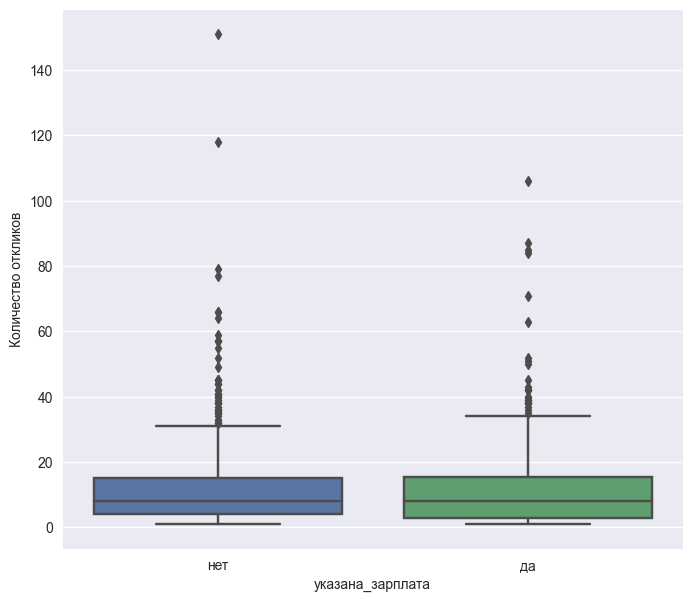

In [92]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(8, 7))
sns.boxplot(x='указана_зарплата', y='Количество откликов', data=df, ax=axes)
axes.set_xticklabels(['нет','да']);

Из графика видно, что в данных наблюдается значительный выброс. Выясним это, отсортировав значения откликов в порядке убывания и просмотрев 10 лучших значений

In [93]:
df[['id','указана_зарплата','Количество откликов']].sort_values(by='Количество откликов', ascending=False).iloc[:10]

id  указана_зарплата  Количество откликов
987   1673  False             151                
1078  1792  False             118                
438   861   True              106                
662   1198  True              87                 
819   1435  True              85                 
1025  1721  True              84                 
1220  1986  False             79                 
935   1597  False             77                 
1185  1947  True              71                 
1133  1862  False             66

Нельзя достоверно сказать, что большие значения являются выбросами. Поэтому оставляем их.

Теперь разделим данные на две части по признаку указана_зарплата:

In [94]:
control = df[ ~df['указана_зарплата'] ]['Количество откликов']
control.describe()

count    749.00
mean     11.52 
std      12.83 
min      1.00  
25%      4.00  
50%      8.00  
75%      15.00 
max      151.00
Name: Количество откликов, dtype: float64

In [95]:
variation = df[ df['указана_зарплата'] ]['Количество откликов']
variation.describe()

count    535.00
mean     11.50 
std      12.43 
min      1.00  
25%      3.00  
50%      8.00  
75%      15.50 
max      106.00
Name: Количество откликов, dtype: float64

Обычно рекомендуется разделить тестовую и контрольную группы поровну при A/B тестировании, чтобы гарантировать, что любые различия в результатах теста не вызваны неравномерным распределением участников между группами. Продолжим, взяв минимальный размер выборки и случайным образом отобрав равное количество точек данных из каждой группы

In [96]:
# определим минимальный размер выборки из двух групп
min_sample_size = min(len(control), len(variation))
print("Размер выборки:", min_sample_size)

Размер выборки: 535


In [97]:
# Случайным образом отберем равное количество точек данных из каждой группы

# для контрольной группы
control = np.random.choice(control, size=min_sample_size, replace=False)

# для тестовой группы 
variation = np.random.choice(variation, size=min_sample_size, replace=False)

Проанализируем наши данные

Проверим, приводит ли указание зарплаты к уменьшению количества откликов. Для этого мы можем использовать t-критерий, чтобы определить, существует ли статистически значимая разница в откликах между двумя группами. Здесь мы используем модуль ttest_ind из библиотеки scipy python для вычисления t-теста для откликов.

In [98]:
t_stat, p_value = ttest_ind(control, variation)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -0.8231474881806221
p-value:  0.41060788486716904


Здесь мы можем видеть, что p-value, полученное в результате t-теста, составляет около 0.5

Сделаем вывод

Если значение p меньше 0,05, мы можем отклонить нулевую гипотезу и сделать вывод, что существует статистически значимая разница в откликах между двумя группами. Более того, в этом случае мы можем заключить, что тестовая или контрольная группа привели к уменьшению откликов в зависимости от их средних. В противном случае мы должны принять нулевую гипотезу. 

In [99]:
alpha = 0.05
if p_value < alpha:
    print("РЕЗУЛЬТАТ: Существует статистически значимая разница в количестве откликов между контрольной и тестовой группами.")
    if variation.mean() > control.mean():
        print("РЕЗУЛЬТАТ: Тестовая группа имеет более высокие количества откликов.")
    else:
        print("РЕЗУЛЬТАТ: Контрольная группа имеет более высокие количества откликов.")
        
else:
    print("РЕЗУЛЬТАТ: Статистически значимой разницы в количестве откликов между контрольной и тестовой группами нет.")

РЕЗУЛЬТАТ: Статистически значимой разницы в количестве откликов между контрольной и тестовой группами нет.


**Вывод:**
* Нет статистически значимой разницы по количеству откликов между вакансиями с указанием какого-либо уровня зарплаты и без.

Ссылка на презентацию:
https://docs.google.com/presentation/d/1corDqkNt9T7r88VbuiyI9qQGjsWIQ8dnR0ndDnQ-yJ8/edit?usp=sharing